**THIS NOTEBOOK CONTAINS FORECAST OF PAYMENT FOR SELLER 10 WITH TRANSACTION DATE FOR DIFFERENT SIZE OF TRAINING AND TESTING DATASETS. IT ALSO CONTAINS THE BEST POSSIBLE FORECAST FOR THE PAYMENT BY TRANSACTION DATE.**

In [13]:
#Importing the prerequisite libraries that are to be used further.
import pandas as pd
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib.pyplot as plt

**Below is the importing of data file. It also includes changing the format of date time and extracting the date from it.**

In [14]:
payment=pd.read_csv("seller_buyer_paymentdetails.csv")

In [3]:
payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86319 entries, 0 to 86318
Data columns (total 7 columns):
TransactionDate    86319 non-null object
PaymentDate        86319 non-null object
PaymentId          86319 non-null int64
SellerId           86319 non-null int64
BuyerId            86319 non-null int64
Pay_Amount         82415 non-null float64
Trans_amount       86319 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 4.6+ MB


In [4]:
payment["TransactionDate"]=pd.to_datetime(pd.to_datetime(payment["TransactionDate"]).dt.date)
payment["PaymentDate"]=pd.to_datetime(pd.to_datetime(payment["PaymentDate"]).dt.date)

In [5]:
payment.head()

,TransactionDate,PaymentDate,PaymentId,SellerId,BuyerId,Pay_Amount,Trans_amount
0,2019-03-15,2016-02-10,150470,19,53484,NaN,10000
1,2017-04-18,2016-02-10,150470,19,53484,NaN,5000000
2,2019-07-18,2019-07-18,150470,1,53487,5000.0,5000
3,2019-07-18,2019-07-18,150470,1,53488,13000.0,13000
4,2019-07-18,2019-07-18,150470,1,53488,17500.0,17500


**The sample data is below consisting of payment details. The amount variable is a discontinuous one, It has several unavailable values.**

In [6]:
#Function to extract seller wise data
#def selw(data, k):
    #data=data[data["SellerId"]==k][["TransactionDate","Amount"]].reset_index(drop=True)
    #return data

In [7]:
#seller_13=selw(payment, 13)

In [8]:
#seller_13.head()

**Delay is the amount of days that a seller is waiting to get the payment from the buyer.**

In [9]:
payment["Delay"]=pd.to_datetime(payment.PaymentDate-payment.TransactionDate).dt.day

In [10]:
payment.head()

,TransactionDate,PaymentDate,PaymentId,SellerId,BuyerId,Pay_Amount,Trans_amount,Delay
0,2019-03-15,2016-02-10,150470,19,53484,NaN,10000,29
1,2017-04-18,2016-02-10,150470,19,53484,NaN,5000000,25
2,2019-07-18,2019-07-18,150470,1,53487,5000.0,5000,1
3,2019-07-18,2019-07-18,150470,1,53488,13000.0,13000,1
4,2019-07-18,2019-07-18,150470,1,53488,17500.0,17500,1


**Below shows the number of transactions that a seller has gone through.**

In [11]:
seller_count=payment.groupby("SellerId").count()

In [12]:
seller_count

,TransactionDate,PaymentDate,PaymentId,BuyerId,Pay_Amount,Trans_amount,Delay
SellerId,,,,,,,
1,8,8,8,8,7,8,8
2,631,631,631,631,597,631,631
3,97,97,97,97,88,97,97
5,1790,1790,1790,1790,1588,1790,1790
6,32,32,32,32,25,32,32
9,2898,2898,2898,2898,2826,2898,2898
10,20803,20803,20803,20803,20393,20803,20803
11,4118,4118,4118,4118,3493,4118,4118
12,7946,7946,7946,7946,7790,7946,7946


**FORECAST FOR SELLER_10**

**Following is the time series preparation for seller 10 by extracting transaction date and payment amount.**

In [358]:
sel=payment[payment.SellerId==10][["TransactionDate","Amount"]]
sel=sel.set_index("TransactionDate")
sel = sel.groupby(pd.Grouper(freq="M")).sum()
sel["Amount"]=sel.Amount.apply(lambda x:int(x))
ts=sel["Amount"]

In [253]:
ts.tail(10)

TransactionDate
2018-10-31    35065089
2018-11-30    33674686
2018-12-31    35308666
2019-01-31    35601218
2019-02-28    37582501
2019-03-31    53420819
2019-04-30    35772720
2019-05-31    37279213
2019-06-30    35416749
2019-07-31       19444
Freq: M, Name: Amount, dtype: int64

In [254]:
ts=ts[:-1]

In [255]:
ts.tail()

TransactionDate
2019-02-28    37582501
2019-03-31    53420819
2019-04-30    35772720
2019-05-31    37279213
2019-06-30    35416749
Freq: M, Name: Amount, dtype: int64

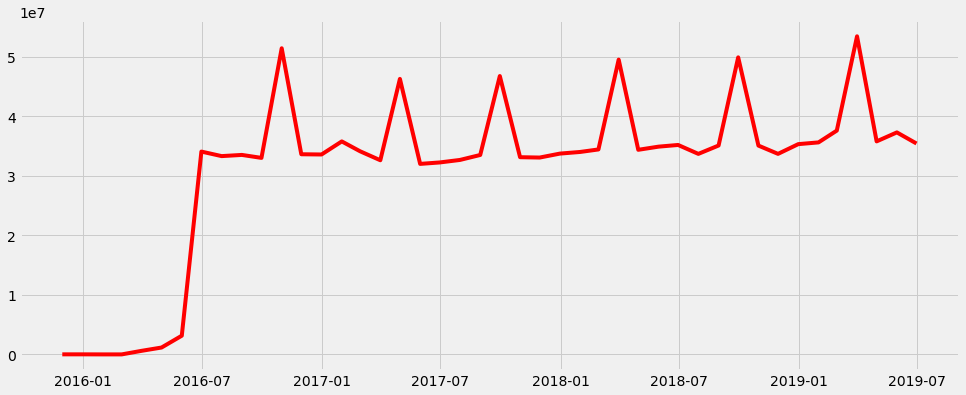

In [262]:
plt.figure(figsize=(15,6))
plt.plot(ts, color="red")

In [264]:
dft(ts)

Test_stats                     -4.519844
p-value                         0.000181
#Lags Used                      5.000000
Number of Observations Used    38.000000
Critical Value (1%)            -3.615509
Critical Value (5%)            -2.941262
Critical Value (10%)           -2.609200
dtype: float64

**This is the sample 10 datapoints for seller 10**

In [273]:
ts.min()

0

In [274]:
ts.head(10)

TransactionDate
2015-11-30        9000
2015-12-31        9000
2016-01-31           0
2016-02-29           0
2016-03-31      608865
2016-04-30     1152470
2016-05-31     3139485
2016-06-30    34058424
2016-07-31    33298404
2016-08-31    33498660
Freq: M, Name: Amount, dtype: int64

**Below is the test for stationarity of the time series.**

In [275]:
from statsmodels.tsa.stattools import adfuller
def dft(ts):
    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test_stats','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return(dfoutput)

**Testing the stationariy for the series by using Dickey Fuller test.**

In [276]:
dft(ts)

Test_stats                     -4.519844
p-value                         0.000181
#Lags Used                      5.000000
Number of Observations Used    38.000000
Critical Value (1%)            -3.615509
Critical Value (5%)            -2.941262
Critical Value (10%)           -2.609200
dtype: float64

**Clearly the Test_stats is already lesser than the minimum critical values. So with 99% confidence it can be inferred that the series is stationary.**

**Below is the preparation of input parameters for the ARIMA model to be applied on the series.**

In [277]:
from statsmodels.tsa.stattools import acf, pacf
# Requisite libraries for computing auto correlation function and partial auto correlation function. 

In [278]:
lag_acf = acf(ts, nlags=5)
lag_pacf = pacf(ts, nlags=5, method='ols')
#ols stands for ordinary least squared.

Text(0.5, 1.0, 'Autocorrelation Function')

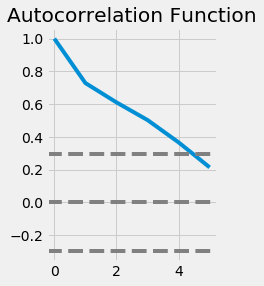

In [279]:
#This is the plotting of acf.
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
            

**From above plot it can be seen that plot is interesecting the upper confidence intervel at lag=4. so value of q is 4.**

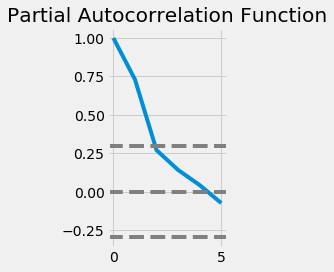

In [280]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

**From above plot it can be seen that plot is interesecting the upper confidence intervel at lag=2. so value of p is 2.**

<font color="blue">**Applying train test approach to the data for seller 10**</font>

**Initially 90 % of data is taken in the training data set and remaining 10% in the testing data set.**

In [281]:
train_size = int(np.ceil(len(ts)*0.9))

In [282]:
#Below is size of training data.
train_size

40

**The data is being split into training and testing set.**

In [283]:
train, test = ts[0:train_size], ts[train_size:len(ts)]

In [285]:
ts.tail()

TransactionDate
2019-02-28    37582501
2019-03-31    53420819
2019-04-30    35772720
2019-05-31    37279213
2019-06-30    35416749
Freq: M, Name: Amount, dtype: int64

In [286]:
train.tail()

TransactionDate
2018-10-31    35065089
2018-11-30    33674686
2018-12-31    35308666
2019-01-31    35601218
2019-02-28    37582501
Freq: M, Name: Amount, dtype: int64

In [287]:
test.head()

TransactionDate
2019-03-31    53420819
2019-04-30    35772720
2019-05-31    37279213
2019-06-30    35416749
Freq: M, Name: Amount, dtype: int64

**Now testing the stationarity of the series.**

In [288]:
dft(train)

Test_stats                     -4.241253
p-value                         0.000561
#Lags Used                      5.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64

**Clearly the test_stats is lesser than even 1% critical value. So the series is stationary.**

In [289]:
#Importing the requisite libraries for arima model.
from statsmodels.tsa.arima_model import ARIMA

**Training the model with calculated values of p,q and d.**

In [290]:
model = ARIMA(train, order=(2, 0, 4))
model_fit = model.fit()

**Final prediction on test set of data by model.**

In [291]:
train.index

DatetimeIndex(['2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29',
               '2016-03-31', '2016-04-30', '2016-05-31', '2016-06-30',
               '2016-07-31', '2016-08-31', '2016-09-30', '2016-10-31',
               '2016-11-30', '2016-12-31', '2017-01-31', '2017-02-28',
               '2017-03-31', '2017-04-30', '2017-05-31', '2017-06-30',
               '2017-07-31', '2017-08-31', '2017-09-30', '2017-10-31',
               '2017-11-30', '2017-12-31', '2018-01-31', '2018-02-28',
               '2018-03-31', '2018-04-30', '2018-05-31', '2018-06-30',
               '2018-07-31', '2018-08-31', '2018-09-30', '2018-10-31',
               '2018-11-30', '2018-12-31', '2019-01-31', '2019-02-28'],
              dtype='datetime64[ns]', name='TransactionDate', freq='M')

In [293]:
test.index

DatetimeIndex(['2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30'], dtype='datetime64[ns]', name='TransactionDate', freq='M')

In [294]:
predicted= model_fit.predict(test.index[0], test.index[-1])

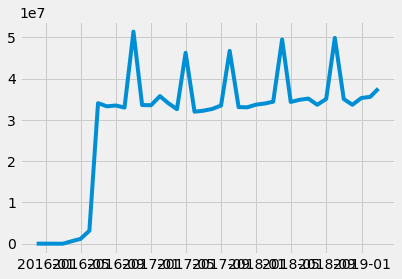

In [295]:
plt.plot(train)

In [296]:
def pred_fin(predicted, train):
    c=pd.Index(predicted.index)
    c=c.insert(0, pd.to_datetime(train.index[-1]))
    lis=list(predicted.values)
    lis.insert(0,train[-1])
    lis=pd.Series(lis,index=c)
    prediction_final=lis.apply(lambda x:int(x))
    return prediction_final

In [297]:
final_prediction=pred_fin(predicted, train)

In [299]:
train.tail()

TransactionDate
2018-10-31    35065089
2018-11-30    33674686
2018-12-31    35308666
2019-01-31    35601218
2019-02-28    37582501
Freq: M, Name: Amount, dtype: int64

In [300]:
final_prediction

2019-02-28    37582501
2019-03-31    37595041
2019-04-30    32178297
2019-05-31    35725657
2019-06-30    31677553
Freq: M, dtype: int64

**test_prediction is the data frame containing the test data and the predicted output by the model.**

<font color="blue">**Akaike information criterion(AIC)**</font>  
**Akaike information criterion is the a model evaluation measure which considers mean sum squared of residuals and the number of parameters to evaluate the quality of a model. So lower the value of aic better is the model.**

In [301]:
model_fit.aic

1399.7247865442805

*For this model aic value is 1437.*

**Below is the forecast of payment amount for seller 10 with 90 percent data in the train set. In the figure below blue line is the training data, red is the forecasted one and green one is the test set value.**

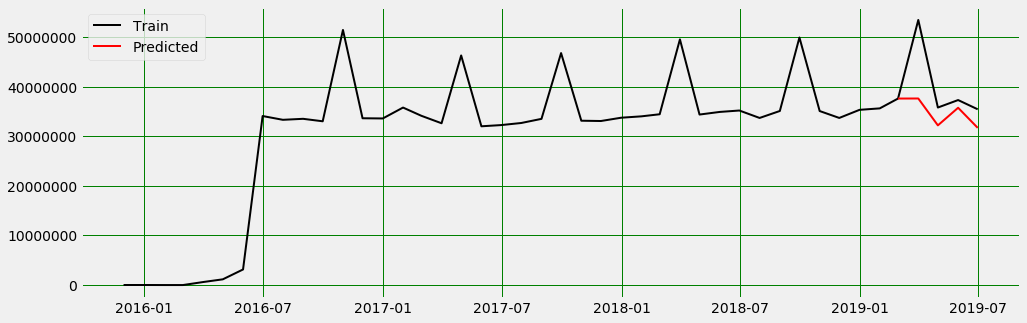

In [302]:
plt.figure(figsize=(15,5))
plt.plot(ts, color="black", linewidth=2, label="Train")
plt.plot(final_prediction,color="red", linewidth=2, label="Predicted")
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.grid(True, color="green")
plt.legend(loc="best")
plt.show()

**It is possible that at a different train test ratio we can have a lower value of Akaike Information Constant(aic) i.e. a better model.  
So in the below code an aic is explorated against the train test ratio.**

In [312]:
from statsmodels.tsa.arima_model import ARIMA
#An empty list to store mean squared error.
rmse=[]
#An empty list to store aic.
aic=[]
# An empty list storing fraction of total data present in training set.
ratio=[]
for x in np.arange(0.6,0.95,0.005):
    #size of training set.
    train_size = int(len(ts)*x)
    #splitting the data.    
    train, test = ts[0:train_size], ts[train_size:len(ts)]
    if dft(train)[0]<dft(train)[4]:
        model = ARIMA(train, order=(2, 0, 4))
        model_fit = model.fit()
        prediction_final= model_fit.predict(test.index[0], test.index[-1])
        aic.append(model_fit.aic)
        rmse.append(np.sqrt(np.mean((-test+prediction_final)**2)))
        ratio.append(x)     

**In above code the if criteria compares the test_stats and the 1% critical value. If it is satisfying the criteria then only further evaluation is done. The corresponding aic values for different models have been stored in aic list.**

<font color="blue">**we will use to criterion to compare the models.**</font>  
**1. ROOT MEAN SQUARED ERROR(rmse)**  
**2. AKAIKI INFORMATION CONSTANT(aic).**

In [313]:
aic_ratio=pd.DataFrame()
aic_ratio["aic"]=aic
aic_ratio["ratio"]=ratio

**Above dataframe contains different aic values corresponding to the fraction of total data in the training set.**

In [314]:
aic_ratio

,aic,ratio
0,1230.875971,0.800
1,1230.875971,0.805
2,1230.875971,0.810
3,1230.875971,0.815
4,1264.902400,0.820
5,1264.902400,0.825
6,1264.902400,0.830
7,1264.902400,0.835
8,1264.902400,0.840
9,1298.473448,0.845


In [315]:
rmse_ratio=pd.DataFrame()
rmse_ratio["rmse"]=rmse
rmse_ratio["ratio"]=ratio
rmse_ratio["rmse"]=rmse_ratio["rmse"].apply(lambda x:int(x))

**Above dataframe contains different mse values corresponding to the fraction of total data in the training set.**

In [316]:
rmse_ratio

,rmse,ratio
0,6682282,0.800
1,6682282,0.805
2,6682282,0.810
3,6682282,0.815
4,7029792,0.820
5,7029792,0.825
6,7029792,0.830
7,7029792,0.835
8,7029792,0.840
9,7552294,0.845


**Now let's visually inspect the behaviour with the mse first.**

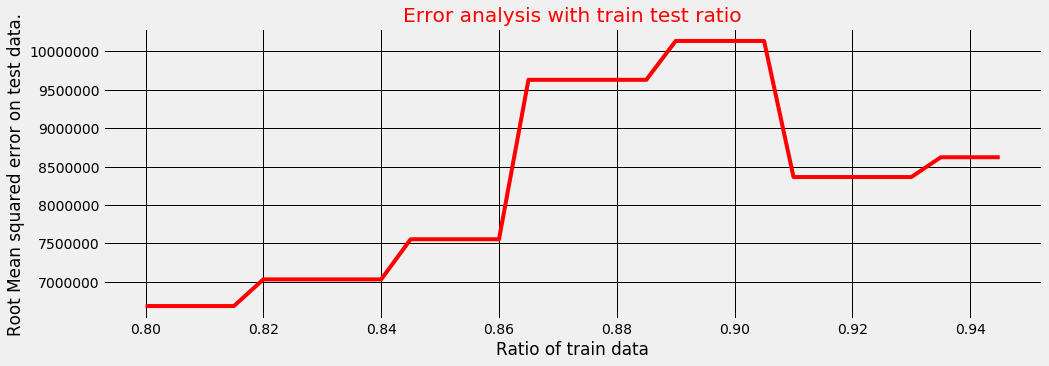

In [317]:
plt.figure(figsize=(15,5))
#plt.plot(ratio,aic, color="red")
plt.plot(ratio,rmse,color="red")
plt.xlabel("Ratio of train data")
plt.ylabel("Root Mean squared error on test data.")
plt.title("Error analysis with train test ratio", color="red")
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.grid(True, color="black")
plt.show() 

<font color="red">**In the above model the value of train size is passed in between 0.6 to 0.95. But in the plot we have only data from 0.775 to 0.950. The reason behind this is from 0.6 to 0.775 all the data have failed the stationarity test by Dicky Fuller test and hence they are automatically rejected.**</font>

**From above plot we can see that as the fraction is increasing aic value is also increasing. So at fraction = 0.78 aic is minimum.**

**Now let's visually inspect the behaviour with the aic.**

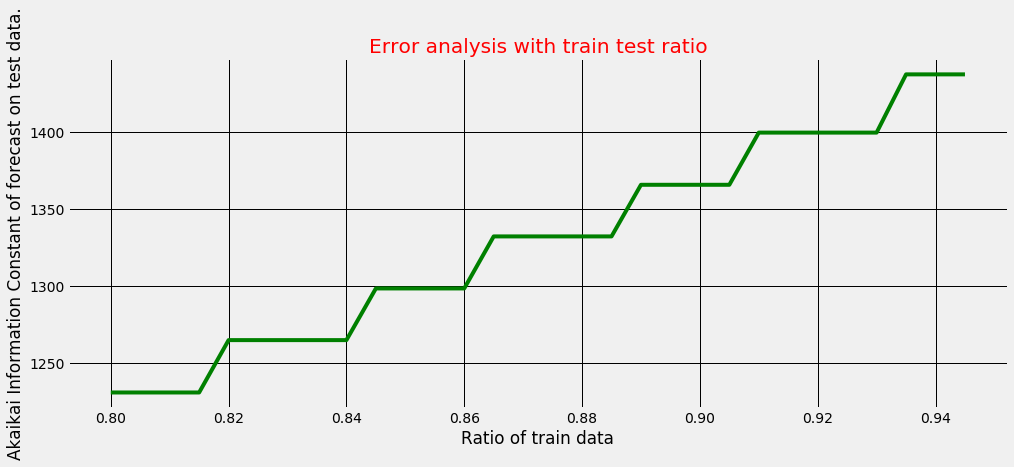

In [318]:
plt.figure(figsize=(15,6))
plt.plot(ratio,aic, color="green")
plt.xlabel("Ratio of train data")
plt.ylabel("Akaikai Information Constant of forecast on test data.")
plt.title("Error analysis with train test ratio", color="red")
plt.grid(True, color="black")
plt.show() 

**From above plot we can see that as the fraction is increasing aic value is also increasing. So at fraction = 0.79 aic is minimum.**

<font color="blue">**CONCLUSION**</font>  
**Both aic and rmse are recomending the same model with ratio 0.780**

<font color="blue"> **NOW BELOW CODE IS PERFORMING THE BEST MODEL WITH TRAINING RATION 0.780**

In [319]:
train_size = int(np.ceil(len(ts)*0.780))

In [320]:
train_size

35

In [321]:
train, test = ts[0:train_size], ts[train_size:len(ts)]

In [322]:
from statsmodels.tsa.arima_model import ARIMA

In [323]:
model = ARIMA(train, order=(2, 0, 4))
model_fit = model.fit()

In [324]:
predicted= model_fit.predict(test.index[0], test.index[-1])

In [325]:
prediction_final=pred_fin(predicted, train)

In [326]:
model_fit.aic

1230.8759709567933

**Above is the aic value for the model. which is least of all the possible models.**

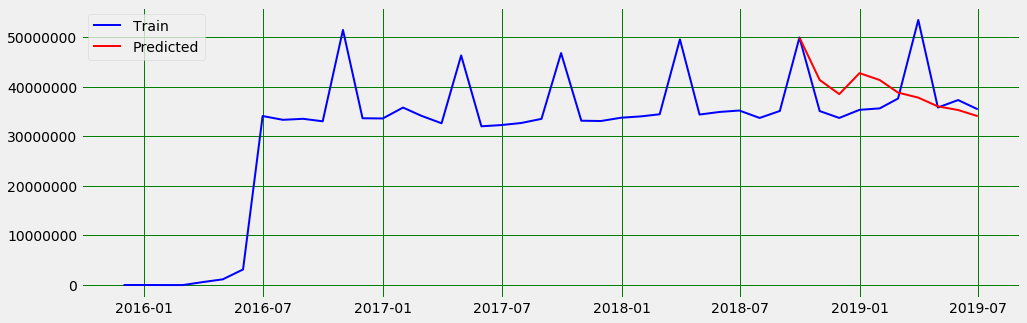

In [327]:
plt.figure(figsize=(15,5))
plt.plot(ts, color="blue", linewidth=2, label="Train")
plt.plot(prediction_final,color="red", linewidth=2, label="Predicted")
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.grid(True, color="green")
plt.legend(loc="best")
plt.show()

**This is the final forecast of the best possible model for seller 10 with training fraction 0.780**